<a href="https://colab.research.google.com/github/mayank-patidar/Linear-Models-on-Property-Loss-in-USA-due-to-Fire-incidents/blob/main/Project01_NFIRS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Linear Models with NFIRS Data 

Your objective is to predict the PROP_LOSS from fires that have occurred in homes and businesses around the USA. This project is a little bit different in that you will be working with BIG DATA - a huge ~500MB file with 2M rows and lots of missing values.
------------------------------


## Data Dictionary
Here is the data dictionary for BASIC (see p. 163 of document, p. 167 of the PDF). Your goal is to predict the loss as a function of the other variables that are available to you.
* https://www.usfa.fema.gov/downloads/pdf/nfirs/NFIRS_Spec_2015.pdf

**[optional]** Here is where I got the original data, which I read in R and then converted to a .csv from (`nfirs.data$basic`)
* https://stackoverflow.com/questions/21288133/loading-rdata-files-into-python
* https://github.com/dnchelst/NFIRS



```
load("C:/Users/dwanik/Downloads/NFIRS2014.RData")
ls() #returns a list of all the objects you just loaded (and anything else in your environment)

head(nfirs.data$basic)

write.csv(nfirs.data$basic,
          file="C:/Users/dwanik/Downloads/NFIRS2014.csv")

```



## Read the data from Google Drive 
Feel free to download a local copy to your OWN Google Drive. Warning: it's a large file!
* https://drive.google.com/file/d/1zWt5b8U-PQ-adm_ob4kjucjTBmVHrQzN/view?usp=sharing

In [ ]:
# import modules
import pandas as pd

In [ ]:
# https://drive.google.com/file/d/1zWt5b8U-PQ-adm_ob4kjucjTBmVHrQzN/view?usp=sharing
!gdown --id 1zWt5b8U-PQ-adm_ob4kjucjTBmVHrQzN # 500 MB file - whoa!

Downloading...
From: https://drive.google.com/uc?id=1zWt5b8U-PQ-adm_ob4kjucjTBmVHrQzN
To: /content/NFIRS2014.csv
100% 471M/471M [00:03<00:00, 118MB/s]


Note that when you run `df.info()` that you can get the data types, but missing values will not be shown. 

In [ ]:
df = pd.read_csv('NFIRS2014.csv')
df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,4,6,14,15,16,17,18,19,37,40) have mixed types.Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116746 entries, 0 to 2116745
Data columns (total 41 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   STATE       object 
 2   FDID        object 
 3   INC_DATE    object 
 4   INC_NO      object 
 5   EXP_NO      int64  
 6   DEPT_STA    object 
 7   INC_TYPE    int64  
 8   ADD_WILD    object 
 9   AID         object 
 10  ALARM       object 
 11  ARRIVAL     object 
 12  INC_CONT    float64
 13  LU_CLEAR    object 
 14  SHIFT       object 
 15  ALARMS      object 
 16  DISTRICT    object 
 17  ACT_TAK1    object 
 18  ACT_TAK2    object 
 19  ACT_TAK3    object 
 20  APP_MOD     object 
 21  SUP_APP     int64  
 22  EMS_APP     int64  
 23  OTH_APP     int64  
 24  SUP_PER     int64  
 25  EMS_PER     int64  
 26  OTH_PER     int64  
 27  RESOU_AID   object 
 28  PROP_LOSS   float64
 29  CONT_LOSS   float64
 30  PROP_VAL    float64
 31  CONT_VAL    float64
 32  FF_DEATH    float64
 33  OTH_DEA

In [ ]:
# look at the first 10 rows
df.head(n=10)

,Unnamed: 0,STATE,FDID,INC_DATE,INC_NO,EXP_NO,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
0,1,AK,11100,2014-01-02,222,0,3,463,N,N,2014-01-02 17:20:00,2014-01-02 17:29:00,NaN,2014-01-02 17:48:00,A,1,NaN,31,81,NaN,Y,1,2,1,1,4,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,00,961,NaN
1,2,AK,11100,2014-01-05,598,0,3,561,N,N,2014-01-05 14:30:00,2014-01-05 14:55:00,NaN,2014-01-05 15:15:00,A,1,NaN,85,80,NaN,Y,1,0,0,2,0,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,900,NaN
2,3,AK,11100,2014-01-09,1030,0,3,114,N,N,2014-01-09 13:50:00,2014-01-09 13:54:00,NaN,2014-01-09 14:00:00,B,1,NaN,86,NaN,NaN,Y,5,1,1,7,2,1,N,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,U,N,NN,419,NaN
3,4,AK,11100,2014-01-10,1212,0,3,561,N,N,2014-01-10 20:34:00,2014-01-10 21:46:00,NaN,2014-01-10 21:50:00,C,1,NaN,80,NaN,NaN,Y,1,0,0,3,0,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,419,NaN
4,5,AK,11100,2014-01-11,1280,0,3,138,N,N,2014-01-11 11:48:00,2014-01-11 11:56:00,NaN,2014-01-11 13:30:00,A,1,NaN,11,12,81,Y,3,2,2,7,3,2,N,20000.0,0.0,50000.0,0.0,0.0,NaN,0.0,NaN,NaN,N,60,919,NaN
5,6,AK,11100,2014-01-12,1392,0,3,142,N,N,2014-01-12 09:53:00,2014-01-12 10:04:00,NaN,2014-01-12 10:44:00,B,1,NaN,11,86,NaN,Y,1,0,0,2,0,0,N,0.0,0.0,1500000.0,20000.0,0.0,NaN,0.0,NaN,NaN,N,NN,669,NaN
6,7,AK,11100,2014-01-13,1559,0,3,561,N,N,2014-01-13 14:26:00,2014-01-13 14:33:00,NaN,2014-01-13 14:35:00,C,1,NaN,80,NaN,NaN,Y,1,0,0,2,0,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,938,NaN
7,8,AK,11100,2014-01-13,1564,0,3,561,N,N,2014-01-13 14:44:00,2014-01-13 14:44:00,NaN,2014-01-13 14:48:00,C,1,NaN,80,NaN,NaN,Y,1,0,0,2,0,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,60,938,NaN
8,9,AK,11100,2014-01-16,1943,0,3,411,N,N,2014-01-16 13:38:00,2014-01-16 13:44:00,NaN,2014-01-16 14:57:00,C,1,NaN,43,81,NaN,Y,2,1,0,4,2,0,N,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,N,NN,974,NaN
9,10,AK,11100,2014-01-17,2129,0,1,113,N,N,2014-01-17 18:43:00,2014-01-17 18:53:00,NaN,2014-01-17 18:54:00,A,1,NaN,86,85,NaN,Y,3,2,0,5,3,0,N,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,2,N,NN,429,NaN


## EDA: Count the number of missing observations per column

In [ ]:
df.isna().sum() # Return the number of rows that have missing values for each column.

Unnamed: 0          0
STATE             329
FDID                0
INC_DATE            0
INC_NO              0
EXP_NO              0
DEPT_STA       557513
INC_TYPE            0
ADD_WILD            0
AID                 0
ALARM               0
ARRIVAL             0
INC_CONT      1612496
LU_CLEAR          114
SHIFT          864553
ALARMS         755315
DISTRICT       893634
ACT_TAK1            3
ACT_TAK2      1437009
ACT_TAK3      1858837
APP_MOD             0
SUP_APP             0
EMS_APP             0
OTH_APP             0
SUP_PER             0
EMS_PER             0
OTH_PER             0
RESOU_AID           0
PROP_LOSS      950366
CONT_LOSS      963294
PROP_VAL      1277801
CONT_VAL      1305971
FF_DEATH        26499
OTH_DEATH     2108003
FF_INJ          26499
OTH_INJ       2108003
DET_ALERT     1468020
HAZ_REL       1606682
MIXED_USE     1754158
PROP_USE       174726
CENSUS        1739681
dtype: int64

## EDA: Which month had the most fires? Which MM/DD/YY had the most fires?

In [ ]:
df['INC_DATE'] = pd.to_datetime(df['INC_DATE']) # Convert the datatype to DateTime

In [ ]:
tmp1 = df.copy() # Create a copy of main dataframe 'df'

In [ ]:
tmp1['INC_TYPE'] = tmp1['INC_TYPE'].astype(str) # Convert the datatype to String

In [ ]:
tmp1 = tmp1[tmp1['INC_TYPE'].str.startswith('1')] # Return all rows where 'INC_TYPE' values start with a '1'.

In [ ]:
tmp1.head()

,Unnamed: 0,STATE,FDID,INC_DATE,INC_NO,EXP_NO,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
2,3,AK,11100,2014-01-09,1030,0,3,114,N,N,2014-01-09 13:50:00,2014-01-09 13:54:00,NaN,2014-01-09 14:00:00,B,1,NaN,86,NaN,NaN,Y,5,1,1,7,2,1,N,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,U,N,NN,419,NaN
4,5,AK,11100,2014-01-11,1280,0,3,138,N,N,2014-01-11 11:48:00,2014-01-11 11:56:00,NaN,2014-01-11 13:30:00,A,1,NaN,11,12,81,Y,3,2,2,7,3,2,N,20000.0,0.0,50000.0,0.0,0.0,NaN,0.0,NaN,NaN,N,60,919,NaN
5,6,AK,11100,2014-01-12,1392,0,3,142,N,N,2014-01-12 09:53:00,2014-01-12 10:04:00,NaN,2014-01-12 10:44:00,B,1,NaN,11,86,NaN,Y,1,0,0,2,0,0,N,0.0,0.0,1500000.0,20000.0,0.0,NaN,0.0,NaN,NaN,N,NN,669,NaN
9,10,AK,11100,2014-01-17,2129,0,1,113,N,N,2014-01-17 18:43:00,2014-01-17 18:53:00,NaN,2014-01-17 18:54:00,A,1,NaN,86,85,NaN,Y,3,2,0,5,3,0,N,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,2,N,NN,429,NaN
10,11,AK,11100,2014-01-19,2314,0,1,111,N,N,2014-01-19 00:45:00,2014-01-19 00:56:00,NaN,2014-01-19 01:26:00,B,1,NaN,74,75,73,Y,5,2,1,9,4,1,N,250.0,1.0,50000.0,10000.0,0.0,NaN,0.0,NaN,NaN,N,NN,419,NaN


In [ ]:
# Create a new column which has the corresponding month name from 'INC_DATE' column.
tmp1['INC_DATE_MONTH'] = tmp1['INC_DATE'].dt.month_name()

In [ ]:
tmp1['INC_DATE_MONTH'].mode() # Return the month had the most fires

0    March
dtype: object

In [ ]:
tmp1['INC_DATE'].mode() # Return the date that had the most fires

0   2014-07-04
dtype: datetime64[ns]

## EDA: Which state had the most property loss (`df['PROP_LOSS']`)
You will need to sum `'PROP_LOSS'` by group, where group is `'STATE'`.

In [ ]:
df.shape ## To check initial number of rows

(2116746, 41)

In [ ]:
df['PROP_LOSS'] = df['PROP_LOSS'].fillna(0) # Replace all missing values with 0.

In [ ]:
tmp = pd.DataFrame(df.PROP_LOSS.groupby(by=df.STATE).sum())   # Calculate the sum of property loss, convert it to a dataframe and store in tmp.
tmp = tmp.sort_values(by=['PROP_LOSS'], ascending= False)     # Sort values in a descending order.
tmp


,PROP_LOSS
STATE,
CA,839716885.0
TX,517798452.0
KY,497602050.0
FL,399988908.0
MI,385733330.0
IL,315622451.0
GA,286015916.0
OH,249603029.0
TN,206991064.0


In [ ]:
tmp.head(1) # Get the top value with highest property loss.

,PROP_LOSS
STATE,
CA,839716885.0


## EDA: Only keep rows where `df['PROP_LOSS`]` is greater than 1000. 
Count how many rows there are now that you have discarded now that you've dropped anything less than 1000. Compute summary statistics of `df['PROP_LOSS`] column.

In [ ]:
df.shape

(2116746, 41)

In [ ]:
df.drop(df[df['PROP_LOSS'] <= 1000].index, inplace = True) # Drop all rows where property loss is less than or equal to 1000.

In [ ]:
df.shape

(169362, 41)

In [ ]:
df.PROP_LOSS.describe()

count    1.693620e+05
mean     4.151527e+04
std      1.107988e+06
min      1.001000e+03
25%      3.500000e+03
50%      8.987500e+03
75%      2.500000e+04
max      4.000000e+08
Name: PROP_LOSS, dtype: float64

## EDA: Only keep rows where `df['PROP_VAL`]` is greater than 1000. 
Count how many rows there are now that you have discarded now that you've dropped anything less than 1000. Compute summary statistics of `df['PROP_VAL`] column.

In [ ]:
df.shape

(169362, 41)

In [ ]:
df.drop(df[df['PROP_VAL'] <= 1000].index, inplace = True) # Drop all rows where property value is less than or equal to 1000

In [ ]:
df.shape

(169362, 41)

In [ ]:
df.PROP_VAL.describe()   ## statistics of PROP_VAL column

count    1.227290e+05
mean     3.261011e+05
std      7.079028e+06
min      1.001000e+03
25%      5.250000e+03
50%      2.791600e+04
75%      1.000000e+05
max      1.000000e+09
Name: PROP_VAL, dtype: float64

## EDA: Convert `df['CENSUS']` column to numeric and coerce the errors.
And check the shape of your dataframe.

In [ ]:
df['CENSUS'] = pd.to_numeric(df['CENSUS'], errors = 'coerce') # Change datatype to numeric.

## EDA: Only keep rows in `df['CENSUS`] that are greater than 0.
We only want to work with data that we know where it is.

In [ ]:
df = df[df['CENSUS'] > 0]      ## for values > 0

df.head()

,Unnamed: 0,STATE,FDID,INC_DATE,INC_NO,EXP_NO,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
771,772,AK,23100,2014-02-17,0004617,1,NaN,131,N,N,2014-02-17 10:52:00,2014-02-17 10:59:00,NaN,2014-02-17 11:31:00,A,NaN,001,86,NaN,NaN,N,1,0,0,3,0,0,N,4000.0,0.0,16000.0,0.0,0.0,NaN,0.0,NaN,U,NaN,NaN,965,50.0
772,773,AK,23100,2014-02-17,0004617,2,NaN,131,N,N,2014-02-17 10:52:00,2014-02-17 10:59:00,NaN,2014-02-17 11:31:00,A,NaN,001,86,NaN,NaN,N,1,0,0,3,0,0,N,2000.0,0.0,30000.0,0.0,0.0,NaN,0.0,NaN,U,NaN,NaN,965,50.0
3130,3131,AK,25400,2014-03-11,8888,0,91,111,N,2,2014-03-11 16:06:00,2014-03-11 16:16:00,3.112014e+10,2014-03-11 18:40:00,NaN,NaN,NaN,11,NaN,NaN,N,4,0,2,10,0,5,N,20000.0,5000.0,NaN,NaN,0.0,NaN,0.0,NaN,2,NaN,NaN,419,9.0
3149,3150,AK,25400,2014-06-09,22252,0,91,111,N,2,2014-06-09 14:15:00,2014-06-09 14:19:00,NaN,2014-06-09 16:08:00,NaN,NaN,NaN,11,12,86,Y,4,0,0,9,0,0,N,2000.0,0.0,10000.0,25000.0,0.0,NaN,0.0,NaN,1,N,NN,419,9.0
3173,3174,AK,25400,2014-10-23,44572,0,91,111,N,2,2014-10-23 16:48:00,2014-10-23 16:56:00,1.023201e+11,2014-10-23 17:49:00,NaN,NaN,NaN,11,12,NaN,N,3,0,0,10,0,0,N,10000.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,2,NaN,NaN,419,9.0


## EDA: Make a scatterplot of `x='PROP_VAL'` and `y='PROP_LOSS'`. 
Add nice axis titles, a plot title, a cool marker color, and most importantly, a bullet point about what you see.

In [ ]:
import matplotlib.pyplot as plt

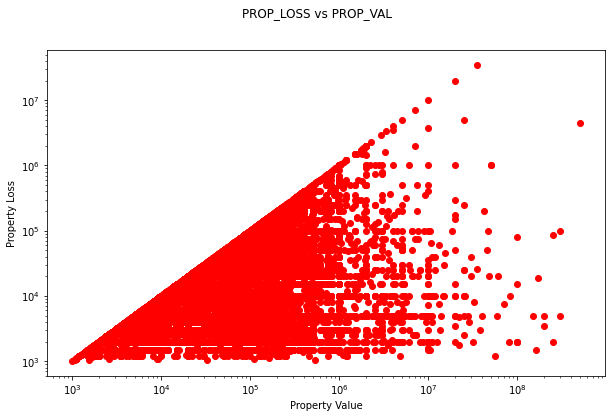

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=df['PROP_VAL'], y=df['PROP_LOSS'], c='red') # Scatter plot

plt.xlim([1E3, 1E7]) # X-axis limit

plt.ylim([1E3, 1E7]) # Y-axis limit

plt.xlabel('Property Value')

plt.ylabel('Property Loss')

plt.xscale('log')

plt.yscale('log')

plt.axis('tight')

plt.suptitle('PROP_LOSS vs PROP_VAL')

plt.show()

**Looking at the plot we see that Property value has a positive co-relation with Property Loss.**

## EDA: Make one interesting plot and one interesting table on your own.
Be creative!

###**Interesting Plot**
### We will be showing the state wise Property loss On map
###Based on color intensity scale on Property loss data we will be able to identify the states with highest to lowest property loss

In [ ]:
# be creative!
import plotly.express as px

In [ ]:
## find sum for each States Property loss
tmp = pd.DataFrame(df.PROP_LOSS.groupby(by=df.STATE).sum())  
tmp.reset_index(inplace=True)
# tmp = tmp.sort_values(by=['PROP_LOSS'], ascending= False)
# tmp.reset_index(drop=False)
tmp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATE      49 non-null     object 
 1   PROP_LOSS  49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [ ]:
## And here's the interesting Plot
## using choropleth to plot the states in USA
fig = px.choropleth(tmp,
                    locations='STATE',
                    color='PROP_LOSS',
                    color_continuous_scale='spectral_r',    
                    locationmode='USA-states',
                    scope='usa')

## color coninous is used to set color accordng to the values in the states

## adding names of the states to the plot
fig.add_scattergeo(
    locations=tmp['STATE'],
    locationmode='USA-states',
    text=tmp['STATE'],
    mode='text')

## To allign the name of the states to the centre of each state in map
fig.update_layout(
    title={'text':'Property LOSS by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()



###**Interesting table**

###We have tried to show the Percentage of Property loss in a state to Property Valuae in particular state

In [ ]:
temp=df[df['PROP_VAL'].notna()]
temp = pd.DataFrame(temp)
temp = pd.DataFrame(temp.groupby(by=df.STATE).sum())

temp.reset_index(inplace=True)
# tmp = tmp.sort_values(by=['PROP_LOSS'], ascending= False)
# tmp.reset_index(drop=False)

## finding the % of property loss
tmp1A = temp[['STATE','PROP_LOSS','PROP_VAL']]
tmp1A['PERCENTAGE_OF_PROP_LOSS'] = round(tmp1A['PROP_LOSS']/tmp1A['PROP_VAL'] * 100,2)
xyz = tmp1A.sort_values(by='PERCENTAGE_OF_PROP_LOSS',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## EDA: Count the number of fires (rows) per State in your clean dataset.
What are the top five States that had fires?


In [ ]:
#tmp1 is the same data data frame which we used to count the mounth with maximum fires
#In tmp1 we already cleaned the data based on the INC Type which is Staring with 1 for all the incidents related to fire
tmp_state = tmp1.groupby('STATE').size() # Return the number of fires in all states
tmp_state

STATE
AK     2989
AL    15449
AR    22686
AZ    14356
CA    74938
CO    11497
CT    11963
DC     1238
DE     4399
FL    54570
GA    39866
HI     2719
IA    12179
ID     5981
IL    54374
IN     5341
KS    21142
KY    19269
LA    22481
MA    29523
MD    19267
ME     5412
MI    31286
MN    15470
MO    29617
MS    21083
MT     3340
NC    50589
ND     1977
NE     5428
NH     5589
NJ    32913
NM    10114
NV     8944
NY    70373
OH    52273
OK    22085
OR    11634
PA    34576
RI     2437
SC    28253
SD     2043
TN    29247
TX    84942
UT     6478
VA    29000
VT     3153
WA    21104
WI    16846
WV    12454
WY     1331
dtype: int64

In [ ]:
state_fire = pd.DataFrame(data = tmp_state).reset_index() # Reset index

In [ ]:
state_fire.rename(columns= {'STATE' : 'STATE',  0 : 'Fires_Count'}, inplace= True) # Rename columns

state_fire

,STATE,Fires_Count
0,AK,2989
1,AL,15449
2,AR,22686
3,AZ,14356
4,CA,74938
5,CO,11497
6,CT,11963
7,DC,1238
8,DE,4399
9,FL,54570


In [ ]:
state_fire.sort_values(by= 'Fires_Count', ascending= False).head(5).reset_index(drop = True) # Return top 5 states with highest count of fires

,STATE,Fires_Count
0,TX,84942
1,CA,74938
2,NY,70373
3,FL,54570
4,IL,54374


## Data Prep: Subset columns for modeling and add a description of what each one means. 
To start, we are going to subset some numeric-looking columns for modeling. Please go into the data dictionary and provide a plain description of what each means. This data is a little messy, so you're going to have to read and try your best to make sense of what's what.

* 'INC_TYPE', 
* 'ALARMS'
* 'ACT_TAK1'
* 'SUP_APP'
* 'EMS_APP'
* 'OTH_APP'
* 'PROP_LOSS'
* 'PROP_VAL'
* 'CONT_VAL'
* 'FF_DEATH'
* 'FF_INJ'
* 'PROP_USE'

**INC_TYPE** - Incident Type <br>
Incident Types with values that begin with the number '1' have fire-related incidents. There are no fire incidents in the rest that does not begin with 1. The different incident type codes are listed below, which categorize further as the number of digits in the code increases. <br>
1 - Fire <br>
2 - OverPressure Rupture, Explosion, Overheat<br>
3 - Rescue & Emergency Medical Service Incident<br>
4 - Hazardous Condition (No Fire)<br>
5- Service Call<br>
6 - Good Intent Call<br>
7 - False Alarm & False Call<br>
8 - Severe Weather & Natural Disaster<br>
9 - Special Incident Type<br>

**ACT_TAK1** - Action Taken 1<br>
In this section a two-digit code is entered to explain the most significant actions taken by the fire
service personnel at the incident scene. Information on the primary action taken in
response to the incident is provided. However, lines also are provided to list two additional actions taken.
Together with the incident type, these data help a fire department document the variety of activities
performed and resources required to respond to a range of emergency situations.

**SUP_APP** - Suppression Appratus Code <br>
Suppression ApparatusCode for the number of fire apparatus and vehicles, excluding EMS vehicles
that responded from your department.

**EMS_APP** - EMS Apparatus <br>
Code for the number of EMS vehicles that responded from your department.
Include Advanced Life Support and Basic Life Support units.

**OTHER APP** -  Other Apparatus<br>
Enter the number of units that responded to this incident from your
department other than fire vehicles and ALS/BLS units.

**PROP_LOSS** - Property Loss<br>
If the building, other structure, outside property or vehicle sustained
damage from flame, smoke, or suppression efforts, estimate of the loss in whole dollars. Exclude from this amount the estimated loss to building contents or other structure contents.

**PROP_VAL** - Property Value<br>
Estimate of the property value prior to the incident, excluding
contents, based upon available information

**PROP_USE** - Property Use<br>
Property use where the incident occurred or coded entry and description in the area indicated.Property Type 500s, 600s, 700s, and 800s. If the property use code falls in the 500, 600, 700, or 800 series, completion of the “C-On-Site Materials” field will be required in the Fire Module (NFIRS-2) if the incident is a fire.


**FF_DEATH** - This indicates death/alive status of fire fighters.

**FF_INJ** - This indicates the code for type of injury caused to a fire fighter.

**CONT_VAL** - We tried to figure out the significane for this variable but we were unable to find the same.

**ALARMS** - This indicates the code for types of alarm.

## Data prep: Convert all columns to numeric and use errors='coerce'.
By using `errors='coerce'`, anything that's not numeric will turn into NaN. Makes it easy to impute or drop NA rows.

Check out this amazing link... 
* https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns

In [ ]:
# Convert to numeric
df['INC_TYPE'] = pd.to_numeric(df['INC_TYPE'], errors='coerce')
df['ALARMS'] = pd.to_numeric(df['ALARMS'], errors='coerce')
df['ACT_TAK1'] = pd.to_numeric(df['ACT_TAK1'], errors='coerce')
df['SUP_APP'] = pd.to_numeric(df['SUP_APP'], errors='coerce')
df['EMS_APP'] = pd.to_numeric(df['EMS_APP'], errors='coerce')
df['OTH_APP'] = pd.to_numeric(df['OTH_APP'], errors='coerce')
df['PROP_LOSS'] = pd.to_numeric(df['PROP_LOSS'], errors='coerce')
df['PROP_VAL'] = pd.to_numeric(df['PROP_VAL'], errors='coerce')
df['CONT_VAL'] = pd.to_numeric(df['CONT_VAL'], errors='coerce')
df['FF_DEATH'] = pd.to_numeric(df['FF_DEATH'], errors='coerce')
df['FF_INJ'] = pd.to_numeric(df['FF_INJ'], errors='coerce')
df['PROP_USE'] = pd.to_numeric(df['PROP_USE'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31134 entries, 771 to 2114068
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  31134 non-null  int64         
 1   STATE       31130 non-null  object        
 2   FDID        31134 non-null  object        
 3   INC_DATE    31134 non-null  datetime64[ns]
 4   INC_NO      31134 non-null  object        
 5   EXP_NO      31134 non-null  int64         
 6   DEPT_STA    27992 non-null  object        
 7   INC_TYPE    31134 non-null  int64         
 8   ADD_WILD    31134 non-null  object        
 9   AID         31134 non-null  object        
 10  ALARM       31134 non-null  object        
 11  ARRIVAL     31134 non-null  object        
 12  INC_CONT    9947 non-null   float64       
 13  LU_CLEAR    31134 non-null  object        
 14  SHIFT       28796 non-null  object        
 15  ALARMS      25485 non-null  float64       
 16  DISTRICT    26022 

## Data Prep: Drop NA rows or use imputation.
Your choice! Use `df.info()` after your imputation or dropNA statement to ensure you have nice clean data. You should have somewhere between 16K and 22K rows depending on what you decide.

In [ ]:
df.isnull().sum() # Count missing values per column

Unnamed: 0        0
STATE             4
FDID              0
INC_DATE          0
INC_NO            0
EXP_NO            0
DEPT_STA       3142
INC_TYPE          0
ADD_WILD          0
AID               0
ALARM             0
ARRIVAL           0
INC_CONT      21187
LU_CLEAR          0
SHIFT          2338
ALARMS         5649
DISTRICT       5112
ACT_TAK1          0
ACT_TAK2      13810
ACT_TAK3      21261
APP_MOD           0
SUP_APP           0
EMS_APP           0
OTH_APP           0
SUP_PER           0
EMS_PER           0
OTH_PER           0
RESOU_AID         0
PROP_LOSS         0
CONT_LOSS      1882
PROP_VAL       8783
CONT_VAL      11348
FF_DEATH          1
OTH_DEATH     30043
FF_INJ            1
OTH_INJ       30043
DET_ALERT     17312
HAZ_REL       17983
MIXED_USE     21019
PROP_USE        256
CENSUS            0
dtype: int64

In [ ]:
# Droping  na rows for folliwing colums as there are very less null values
df['ALARMS'].dropna()
df['ACT_TAK1'].dropna()

771        86.0
772        86.0
3130       11.0
3149       11.0
3173       11.0
           ... 
2114057    11.0
2114059    11.0
2114061    11.0
2114064    11.0
2114068    11.0
Name: ACT_TAK1, Length: 31134, dtype: float64

In [ ]:
#We decided to impute the null values of the prop values based on the our interesting tables result
#there we counted the prop loss as % of the prop value for states
#so now using the prop loss values and prop loss as percentage of the prop value we imputed the prop value
xyz.drop(columns=['PROP_VAL','PROP_LOSS'],inplace=True)
#pd.merge(df, xyz['PERCENTAGE_OF_PROP_LOSS'], on='STATE')
dfinal = df.merge(xyz, on='STATE', how = 'inner')
dfinal['PROP_VAL'].fillna(dfinal['PROP_LOSS']/dfinal['PERCENTAGE_OF_PROP_LOSS'],inplace=True)
dfinal.isnull().sum()

Unnamed: 0                     0
STATE                          0
FDID                           0
INC_DATE                       0
INC_NO                         0
EXP_NO                         0
DEPT_STA                    3142
INC_TYPE                       0
ADD_WILD                       0
AID                            0
ALARM                          0
ARRIVAL                        0
INC_CONT                   21187
LU_CLEAR                       0
SHIFT                       2338
ALARMS                      5649
DISTRICT                    5112
ACT_TAK1                       0
ACT_TAK2                   13807
ACT_TAK3                   21257
APP_MOD                        0
SUP_APP                        0
EMS_APP                        0
OTH_APP                        0
SUP_PER                        0
EMS_PER                        0
OTH_PER                        0
RESOU_AID                      0
PROP_LOSS                      0
CONT_LOSS                   1882
PROP_VAL  

In [ ]:
dfinal = dfinal[['INC_TYPE',
'ALARMS',
'ACT_TAK1',
'SUP_APP',
'EMS_APP',
'OTH_APP',
'PROP_LOSS',
'PROP_VAL',
'CONT_VAL',
'FF_DEATH',
'FF_INJ',
'PROP_USE']]
dfinal.dropna(inplace=True)


In [ ]:
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16516 entries, 6 to 31120
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   INC_TYPE   16516 non-null  int64  
 1   ALARMS     16516 non-null  float64
 2   ACT_TAK1   16516 non-null  float64
 3   SUP_APP    16516 non-null  int64  
 4   EMS_APP    16516 non-null  int64  
 5   OTH_APP    16516 non-null  int64  
 6   PROP_LOSS  16516 non-null  float64
 7   PROP_VAL   16516 non-null  float64
 8   CONT_VAL   16516 non-null  float64
 9   FF_DEATH   16516 non-null  float64
 10  FF_INJ     16516 non-null  float64
 11  PROP_USE   16516 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 1.6 MB


In [ ]:
dfinal['FF_INJ']=dfinal['FF_INJ'].dropna()   ## droping NA values


In [ ]:
dfinal.isnull().sum()   ## can cross check here

INC_TYPE     0
ALARMS       0
ACT_TAK1     0
SUP_APP      0
EMS_APP      0
OTH_APP      0
PROP_LOSS    0
PROP_VAL     0
CONT_VAL     0
FF_DEATH     0
FF_INJ       0
PROP_USE     0
dtype: int64

Check your work!

In [ ]:
df.shape

(31134, 41)

In [ ]:
df.isna().sum()

Unnamed: 0        0
STATE             4
FDID              0
INC_DATE          0
INC_NO            0
EXP_NO            0
DEPT_STA       3142
INC_TYPE          0
ADD_WILD          0
AID               0
ALARM             0
ARRIVAL           0
INC_CONT      21187
LU_CLEAR          0
SHIFT          2338
ALARMS         5649
DISTRICT       5112
ACT_TAK1          0
ACT_TAK2      13810
ACT_TAK3      21261
APP_MOD           0
SUP_APP           0
EMS_APP           0
OTH_APP           0
SUP_PER           0
EMS_PER           0
OTH_PER           0
RESOU_AID         0
PROP_LOSS         0
CONT_LOSS      1882
PROP_VAL       8783
CONT_VAL      11348
FF_DEATH          1
OTH_DEATH     30043
FF_INJ            1
OTH_INJ       30043
DET_ALERT     17312
HAZ_REL       17983
MIXED_USE     21019
PROP_USE        256
CENSUS            0
dtype: int64

**Box Plots**

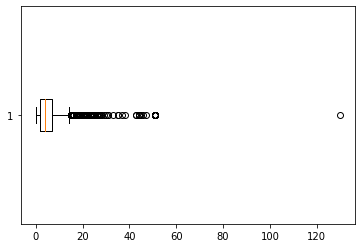

In [ ]:
plt.boxplot(dfinal['SUP_APP'], vert=False)
plt.show()

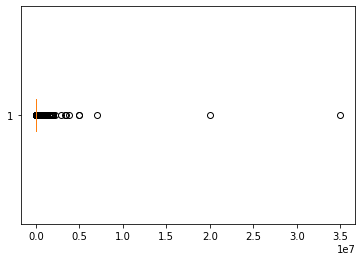

In [ ]:
plt.boxplot(dfinal['PROP_LOSS'], vert=False)
plt.show()

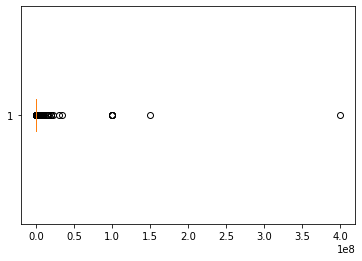

In [ ]:
plt.boxplot(dfinal['CONT_VAL'], vert=False)
plt.show()

We discovered outliers in the box plots for 'SUP APP,' 'PROP LOSS,' and 'CONT VAL,' which would have caused problems when min/max scaling input variables. As a result, a few of the severe outliers were eliminated from the analysis.

In [ ]:
dfinal.drop(dfinal[dfinal['SUP_APP'] == 130].index, inplace=True)

In [ ]:
dfinal.drop(dfinal[dfinal['PROP_LOSS'] == 35000000].index, axis=0, inplace=True)

In [ ]:
dfinal.drop(dfinal[dfinal['PROP_LOSS'] == 20000000].index, axis=0, inplace=True)

In [ ]:
dfinal.drop(dfinal[dfinal['CONT_VAL'] >= 100000000].index, axis=0, inplace=True)

Now we are ready for modeling. No missing values!

## Modeling: Define $X$ and $y$
`y = 'PROP_LOSS'`

`X = all other columns!`

In [ ]:
y = dfinal['PROP_LOSS'] # Output variable
X = dfinal.drop('PROP_LOSS', axis = 1) # Input variables

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16506 entries, 6 to 31120
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   INC_TYPE  16506 non-null  int64  
 1   ALARMS    16506 non-null  float64
 2   ACT_TAK1  16506 non-null  float64
 3   SUP_APP   16506 non-null  int64  
 4   EMS_APP   16506 non-null  int64  
 5   OTH_APP   16506 non-null  int64  
 6   PROP_VAL  16506 non-null  float64
 7   CONT_VAL  16506 non-null  float64
 8   FF_DEATH  16506 non-null  float64
 9   FF_INJ    16506 non-null  float64
 10  PROP_USE  16506 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


In [ ]:
print(y.shape)
print(X.shape)

(16506,)
(16506, 11)


## Modeling: Split data using an 80/20 random split. Use a random_state so that you can repeat your work.

In [ ]:
import numpy as np

# these functions are useful for splitting and normalization

from sklearn.preprocessing import  MinMaxScaler

from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling

from sklearn.linear_model import LinearRegression

# regression error metrics

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.metrics import median_absolute_error

from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm

from sklearn.linear_model import ElasticNet, ElasticNetCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,

                                                    test_size = 0.2, # 80/20 split

                                                    shuffle = True,

                                                    random_state = 42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13204, 11) (3302, 11) (13204,) (3302,)


In [ ]:
# Convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
scaler = MinMaxScaler() # For min/max scaling

In [ ]:
X_train = scaler.fit_transform(X_train) # scale

In [ ]:
# take that coordinate system you just learned on X_train, and APPLY it to X_test

X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.03030303, 0.        , 0.11956522, ..., 0.        , 0.        ,
        0.57317073],
       [0.05785124, 0.04761905, 0.11956522, ..., 0.        , 0.        ,
        0.42581301],
       [0.03030303, 0.04761905, 0.11956522, ..., 0.        , 0.        ,
        0.42581301],
       ...,
       [0.1046832 , 0.04761905, 0.11956522, ..., 0.        , 0.        ,
        0.97662602],
       [0.03030303, 0.        , 0.93478261, ..., 0.        , 0.        ,
        0.43597561],
       [0.08815427, 0.14285714, 0.11956522, ..., 0.        , 0.        ,
        0.98069106]])

In [ ]:
tmp2 = pd.DataFrame(X_train) # Convert to dataframe
tmp2.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,13204.000000,13204.000000,13204.000000,13204.000000,13204.000000,13204.000000,13204.000000,1.320400e+04,13204.000000,13204.000000,13204.000000
mean,0.060550,0.043951,0.253774,0.096061,0.020699,0.011900,0.001290,2.270106e-03,0.000114,0.003509,0.609687
std,0.089845,0.039756,0.292029,0.083568,0.053473,0.031733,0.017633,2.240237e-02,0.009729,0.023237,0.260502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.030303,0.047619,0.119565,0.039216,0.000000,0.000000,0.000016,3.333333e-08,0.000000,0.000000,0.425813
50%,0.030303,0.047619,0.119565,0.078431,0.000000,0.000000,0.000100,1.000000e-04,0.000000,0.000000,0.435976
75%,0.085399,0.047619,0.119565,0.137255,0.000000,0.015385,0.000416,6.666667e-04,0.000000,0.000000,0.975610
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


In [ ]:
tmp2 = pd.DataFrame(X_test) # Convert to dataframe

tmp2.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3302.000000,3.302000e+03,3.302000e+03,3302.000000,3302.000000,3302.000000
mean,0.060312,0.043970,0.254905,0.094850,0.019836,0.013027,9.100938e-04,1.474295e-03,0.000151,0.003912,0.604862
std,0.091000,0.037814,0.294622,0.078926,0.051616,0.033379,1.028295e-02,8.078092e-03,0.008701,0.022269,0.259185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.093377e-08,0.000000e+00,0.000000,0.000000,0.000000
25%,0.030303,0.047619,0.119565,0.039216,0.000000,0.000000,1.646373e-05,1.666667e-07,0.000000,0.000000,0.425813
50%,0.030303,0.047619,0.119565,0.078431,0.000000,0.000000,1.164637e-04,1.000000e-04,0.000000,0.000000,0.435976
75%,0.085399,0.047619,0.119565,0.137255,0.000000,0.015385,4.497971e-04,8.333333e-04,0.000000,0.000000,0.953252
max,1.049587,1.000000,1.000000,1.000000,0.687500,0.446154,3.333332e-01,1.666667e-01,0.500000,0.333333,1.000000


## Modeling: Fit a linear regression (vanilla, ridge, lasso or elastic net).
Your choice! Feel free to experiment here and see what gives the best result.

**Simple Linear Regression Model**

In [ ]:
LR = LinearRegression() # Create new object for LinearRegression

# fit the model - one line of code - LR is now a 'model object'

LR = LR.fit(X_train, y_train) # Run the model. Order matters here! don't reverse it!

In [ ]:
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)

In [ ]:
print(train_preds.shape) 
print(y_train.shape)
print(test_preds.shape)
print(y_test.shape)

(13204,)
(13204,)
(3302,)
(3302,)


## Evaluation: calculate mean absolute error and median absolute error for train and test partition.
Which number is lower - mean or median absolute error? And what does this mean about how your model is predicting?

In [ ]:
# Calculate Mean Absolute Error

trainMAE = mean_absolute_error(y_train, train_preds)

print("This is trainMAE:", trainMAE) # train

testMAE = mean_absolute_error(y_test, test_preds)

print("This is testMAE:", testMAE) # test

This is trainMAE: 36202.236910556996
This is testMAE: 39058.63939688454


In [ ]:
# Calculate Median Absolute Error

trainMAE = median_absolute_error(y_train, train_preds)

print("This is trainMAE:", trainMAE) # train

testMAE = median_absolute_error(y_test, test_preds)

print("This is testMAE:", testMAE) # test

This is trainMAE: 17781.255304798447
This is testMAE: 17801.070765764533


As we can see above, the Median Absolute Error is lower than the Mean Absolute error. 
This indicates that the lower and upper limit of error is less in magnitude.

## Evalution: Calculate the baseline mean-only predictions and calculate both mean and median absolute error.

In [ ]:
baseline = y_train # Create new variable

In [ ]:
baseline = pd.DataFrame(baseline) # Convert to dataframe
baseline.head()

,0
0,20000.0
1,15000.0
2,100000.0
3,5000.0
4,2000.0


In [ ]:
baseline['baseline_train_preds'] = y_train.mean() # Create new column
baseline

,0,baseline_train_preds
0,20000.0,33594.244168
1,15000.0,33594.244168
2,100000.0,33594.244168
3,5000.0,33594.244168
4,2000.0,33594.244168
...,...,...
13199,6000.0,33594.244168
13200,2000.0,33594.244168
13201,50000.0,33594.244168
13202,1500.0,33594.244168


In [ ]:
# Calculate Mean Absolute Error

trainMAE = mean_absolute_error(y_train, baseline['baseline_train_preds'])

print("This is trainMAE:", trainMAE) # train

This is trainMAE: 39990.65758248833


In [ ]:
# Calculate Median Absolute Error

trainMAE = median_absolute_error(y_train, baseline['baseline_train_preds'])

print("This is trainMAE:", trainMAE) # train

This is trainMAE: 28594.244168433805


In [ ]:
baseline_test = y_test # Create new variable

In [ ]:
baseline_test = pd.DataFrame(baseline_test)
baseline_test.head()

,0
0,45000.0
1,32000.0
2,7000.0
3,6000.0
4,2000.0


In [ ]:
baseline_test['baseline_test_preds'] = y_test.mean() # Create new column
baseline_test

,0,baseline_test_preds
0,45000.0,37805.007571
1,32000.0,37805.007571
2,7000.0,37805.007571
3,6000.0,37805.007571
4,2000.0,37805.007571
...,...,...
3297,40000.0,37805.007571
3298,25000.0,37805.007571
3299,1500.0,37805.007571
3300,5000.0,37805.007571


In [ ]:
# Calculate Mean Absolute Error

trainMAE = mean_absolute_error(y_test, baseline_test['baseline_test_preds'])

print("This is testMAE:", trainMAE) # train

This is testMAE: 46398.68939111842


In [ ]:
# Calculate Mean Absolute Error

trainMAE = median_absolute_error(y_test, baseline_test['baseline_test_preds'])

print("This is testMAE:", trainMAE) # train

This is testMAE: 32805.007571168986


**Elastic Net**

In [ ]:
model = sm.OLS(y_train,X_train)

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.144
Method:                 Least Squares   F-statistic:                              203.1
Date:                Sat, 16 Oct 2021   Prob (F-statistic):                        0.00
Time:                        03:48:26   Log-Likelihood:                     -1.7394e+05
No. Observations:               13204   AIC:                                  3.479e+05
Df Residuals:                   13193   BIC:                                  3.480e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1823.3147   1.28e+04     -0.142      0.887   -2.69e+04    2.33e+04
x2          1.256e+05   2.74e+04      4.582      0.000    7.18e+04    1.79e+05
x3         -1905.9435   3706.786     -0.514      0.607   -9171.778    5359.890
x4           2.41e+05   1.21e+04     19.945      0.000    2.17e+05    2.65e+05
x5          1.753e+04   2.13e+04      0.823      0.410   -2.42e+04    5.93e+04
x6          3.406e+05   3.56e+04      9.580      0.000    2.71e+05     4.1e+05
x7          1.695e+05   6.39e+04      2.654      0.008    4.43e+04    2.95e+05
x8          7.071e+05   5.02e+04     14.074      0.000    6.09e+05    8.06e+05
x9         -2.202e+05   1.14e+05     -1.926      0.054   -4.44e+05    3894.731
x10         9.694e+05   4.83e+04     20.050      0.000    8.75e+05    1.06e+06
x11        -6213.9643   2787.124     -2.230      0.026   -1.17e+04    -750.800
==============================================================================
Omnibus:                    30526.963   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        381704935.819
Skew:                          22.456   Prob(JB):                         0.00
Kurtosis:                     834.734   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lr = LinearRegression() # Create object

lr.fit(X_train, y_train) # Run the model

print("For Training set : ", lr.score(X_train,y_train))

print("For Test set : ",lr.score(X_test,y_test))

For Training set :  0.09069293649506571
For Test set :  0.0856077859725255


In [ ]:
# try l1_ratio=0.5

eln = ElasticNet(l1_ratio=0.5)
eln.fit(X_train, y_train) # Run the model
eln.score(X_train,y_train) # check the score metric

0.0032208204342116797

In [ ]:
# try l1_ratio=0.1

eln = ElasticNet(l1_ratio=0.1)
eln.fit(X_train, y_train) # Run the model
eln.score(X_train,y_train) # check the score metric

0.0019111193447636234

In [ ]:
# try l1_ratio=0.9

eln = ElasticNet(l1_ratio=0.9)
eln.fit(X_train, y_train) # Run the model
eln.score(X_train,y_train) # check the score metric

0.010563118877035094

In [ ]:
# use cross validation to find the best alpha

elasticcv = ElasticNetCV(alphas=[0.01, 0.1, 0.3, 0.4, 0.45, 0.5,1, 5, 7, 10, 100],l1_ratio=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

elasticcv.fit(X_train, y_train) # Run the model

alpha = elasticcv.alpha_

ratio = elasticcv.l1_ratio_

print('The optimal alpha is ',alpha,'and the optimal ratio is ',ratio)

print(elasticcv.score(X_train, y_train))

The optimal alpha is  0.01 and the optimal ratio is  0.9
0.06965482871946782


## Evaluation: Scatterplots of `x=Actual` and `y=Pred`
Make a nice scatterplot of actual vs. predicted with log scale for X and y. Use axis limits of [1E3,1E7] for both x and y axes. Add a 45 degree line, a plot title, axis titles etc. Do this for both train and test partitions.

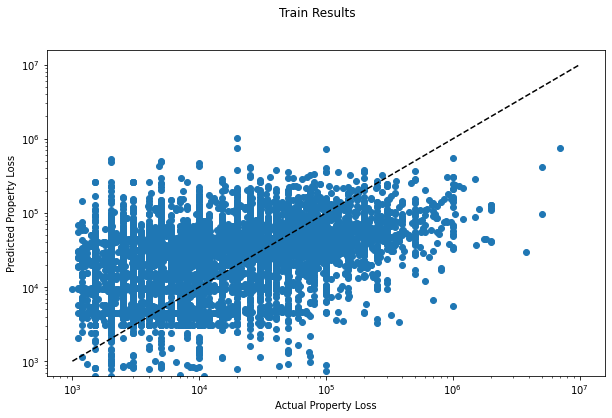

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_train, y=train_preds) # Scatter plot
plt.xlim([1E3, 1E7]) # X-axis limit
plt.ylim([1E3, 1E7]) # Y-axis limit

plt.xlabel('Actual Property Loss')

plt.ylabel('Predicted Property Loss')

## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.plot([1E3, 1E7], [1E3, 1E7], '--k') # 45 degree line

plt.axis('tight')

plt.suptitle('Train Results')

plt.show()

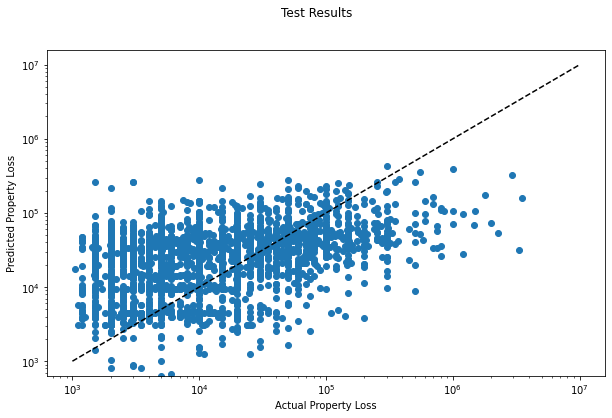

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_test, y=test_preds) # Scatter plot

plt.xlim([1E3, 1E7]) # X-axis limit
plt.ylim([1E3, 1E7]) # Y-axis limit

plt.xlabel('Actual Property Loss')
plt.ylabel('Predicted Property Loss')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Test Results')
plt.plot([1E3, 1E7], [1E3, 1E7], '--k') # 45 degree line

plt.axis('tight')

plt.show()

## Discussion: What did your learn?
Write five meaningful bullets of what you learned and if you have a 'good' model or not.

* While creating an interesting plot, we initially created a bar plot to compare the Property Values in each states. But later we tried to make the plot on US map. We learned to use a new library for geographic plot and the graph now looks much better in terms of visualization and understanding too.

* For the interesting table, we created a table in terms of analyzing the top states where the most of the property loss was stated. This shows that the percentage loss in terms of property value in some states is larger than one would have expected it to be. This cab be easily seen from the table we have created.

* While doing the min max scaling for x and y variables on train and test, we found an interesting thing that even after test scaling the values in column Prop_val the values are not between 0 and 1 it has some higher and lower values too. This may be due to the fact that, this particular column has most highest values as compared to other columns in the whole dataset.

* Following the implementation of the Linear Regression Model, it is clear that the model is not as accurate as it should be, with a low score of 0.085.

* From the train and test scatterplots we saw that the model fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data.

# [Optional:] A random forest! (+1 pt extra credit)

Now instead of a linear model, use this code instead of the linear model. If you had this as your original model code...



```
# fit the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
```



Try replacing it with a random forest regressor... like this....


```
# left for students later as a treat...

# fit the model
from sklearn.ensemble import RandomForestRegressor
LR = RandomForestRegressor()
LR.fit(X_train, y_train)
```



How do your model results change? Add a bullet point of how easy is it to fit machine learning models in Python :)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
LR = RandomForestRegressor() # Create new object

# fit the model - one line of code - LR is now a 'model object'

LR = LR.fit(X_train, y_train) # order matters here! don't reverse it!

train_preds = LR.predict(X_train) # Training set predictions

test_preds = LR.predict(X_test) # Test set prediction

In [ ]:
lr = RandomForestRegressor() # Create new object

lr.fit(X_train, y_train) # Run the model

print("For Training set : ", lr.score(X_train,y_train))

print("For Test set : ",lr.score(X_test,y_test))

For Training set :  0.8706050858515453
For Test set :  0.20472348617400304


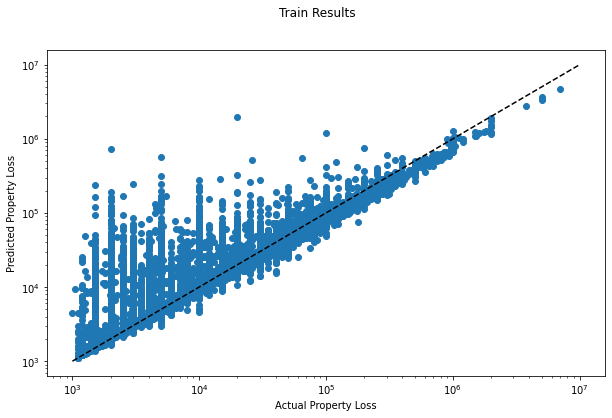

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_train, y=train_preds) # Scatter plot
plt.xlim([1E3, 1E7]) # X-axis limit
plt.ylim([1E3, 1E7]) # Y-axis limit

plt.xlabel('Actual Property Loss')
plt.ylabel('Predicted Property Loss')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.plot([1E3, 1E7], [1E3, 1E7], '--k') # 45 degree line

plt.axis('tight')

plt.suptitle('Train Results')

plt.show()

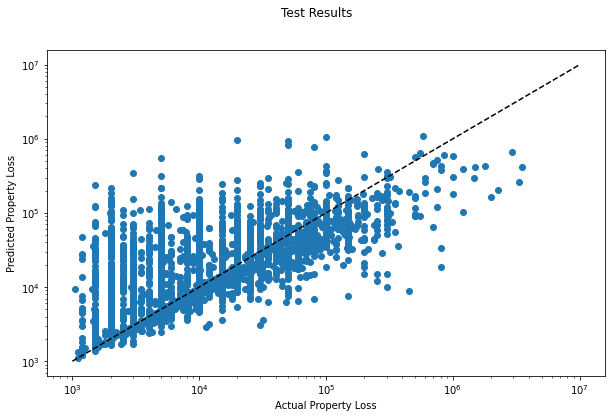

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(x=y_test, y=test_preds) # Scatter plot

plt.xlim([1E3, 1E7]) # X-axis limit
plt.ylim([1E3, 1E7]) # Y-axis limit

plt.xlabel('Actual Property Loss')
plt.ylabel('Predicted Property Loss')


## converting the plot to log scale to better understnd the graph in terms of visibility
plt.xscale('log')
plt.yscale('log')

plt.suptitle('Test Results')
plt.plot([1E3, 1E7], [1E3, 1E7], '--k') # 45 degree line

plt.axis('tight')

plt.show()

Based on the aforementioned plots and scores for both models, we can conclude that the Random Forest model outperforms the Linear Regression Model on this dataset.

For the test dataset, the Linear Regression model gets a score of 0.085, whereas the RandomForest model has a score of 0.23, which is good.

# Completed!!!